In [1]:
import pandas as pd

dataset = pd.read_excel('D:/Documents/UNJEHH/SEMESTER 6/BOOTCAMP/DIBIMBING/Data/Klasifikasi Tingkat Kemiskinan di Indonesia.xlsx')
dataset.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,9.48,7148,66.41,65.28,71.56,87.45,5.71,71.15,1648096,0
1,ACEH,Aceh Singkil,20.36,8.68,8776,69.22,67.43,69.56,78.58,8.36,62.85,1780419,1
2,ACEH,Aceh Selatan,13.18,8.88,8180,67.44,64.40,62.55,79.65,6.46,60.85,4345784,0
3,ACEH,Aceh Tenggara,13.41,9.67,8030,69.44,68.22,62.71,86.71,6.43,69.62,3487157,0
4,ACEH,Aceh Timur,14.45,8.21,8577,67.83,68.74,66.75,83.16,7.13,59.48,8433526,0


In [2]:
dataset = dataset.rename(columns={
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'P0 Persen',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)': 'Mean Lama Sekolah 15+',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'Pengeluaran perKapita',
    'Indeks Pembangunan Manusia': 'IPM',
    'Umur Harapan Hidup (Tahun)': 'Umur Harapan Hidup',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak': 'Akses Sanitasi Layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak': 'Akses Air Minum Layak',
    'Tingkat Pengangguran Terbuka': 'Pengangguran Terbuka',
    'Tingkat Partisipasi Angkatan Kerja': 'Partisipasi Angkatan Kerja',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)': 'PDRB Harga Konstan',
    'Klasifikasi Kemiskinan': 'Klasifikasi Kemiskinan'
})

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Provinsi                    514 non-null    object 
 1   Kab/Kota                    514 non-null    object 
 2   P0 Persen                   514 non-null    float64
 3   Mean Lama Sekolah 15+       514 non-null    float64
 4   Pengeluaran perKapita       514 non-null    int64  
 5   IPM                         514 non-null    float64
 6   Umur Harapan Hidup          514 non-null    float64
 7   Akses Sanitasi Layak        514 non-null    float64
 8   Akses Air Minum Layak       514 non-null    float64
 9   Pengangguran Terbuka        514 non-null    float64
 10  Partisipasi Angkatan Kerja  514 non-null    float64
 11  PDRB Harga Konstan          514 non-null    int64  
 12  Klasifikasi Kemiskinan      514 non-null    int64  
dtypes: float64(8), int64(3), object(2)


In [3]:
object_columns = dataset.iloc[:, 2:].select_dtypes(include=['object']).columns.tolist()
object_columns

[]

In [4]:
for column in object_columns:
    dataset[column] = dataset[column].str.replace(',', '.').astype(float)

In [5]:
# Memastikan tidak ada nilai kosong (missing values)
missing_counts = dataset.isna().sum()

# Load dataset
X = dataset.drop(columns = ['Provinsi', 'Kab/Kota', 'Klasifikasi Kemiskinan'])
y = dataset['Klasifikasi Kemiskinan']

# Menampilkan informasi data setelah pra-pemrosesan
print(missing_counts)
X.info(), y.value_counts()

Provinsi                      0
Kab/Kota                      0
P0 Persen                     0
Mean Lama Sekolah 15+         0
Pengeluaran perKapita         0
IPM                           0
Umur Harapan Hidup            0
Akses Sanitasi Layak          0
Akses Air Minum Layak         0
Pengangguran Terbuka          0
Partisipasi Angkatan Kerja    0
PDRB Harga Konstan            0
Klasifikasi Kemiskinan        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   P0 Persen                   514 non-null    float64
 1   Mean Lama Sekolah 15+       514 non-null    float64
 2   Pengeluaran perKapita       514 non-null    int64  
 3   IPM                         514 non-null    float64
 4   Umur Harapan Hidup          514 non-null    float64
 5   Akses Sanitasi Layak        514 non-null    float64
 6   Akses

(None,
 Klasifikasi Kemiskinan
 0    452
 1     62
 Name: count, dtype: int64)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi model
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print(f"Random Forest Accuracy: {accuracy*100:.2f}%")



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.94      1.00      0.97        16

    accuracy                           0.99       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.99      0.99      0.99       103

Random Forest Accuracy: 99.03%


C:\Users\mochh\AppData\Local\Temp\ipykernel_12648\1092128986.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


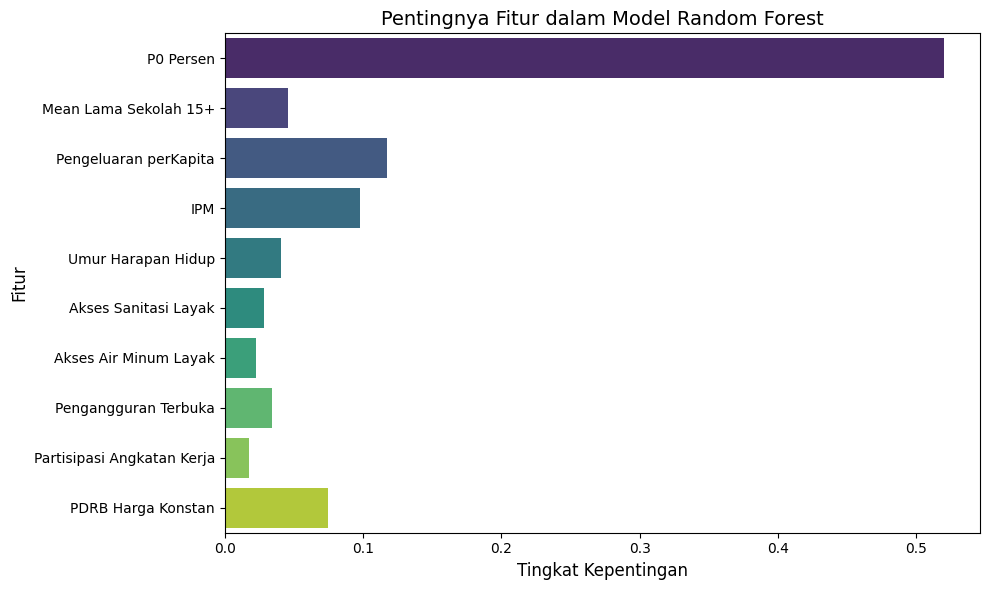

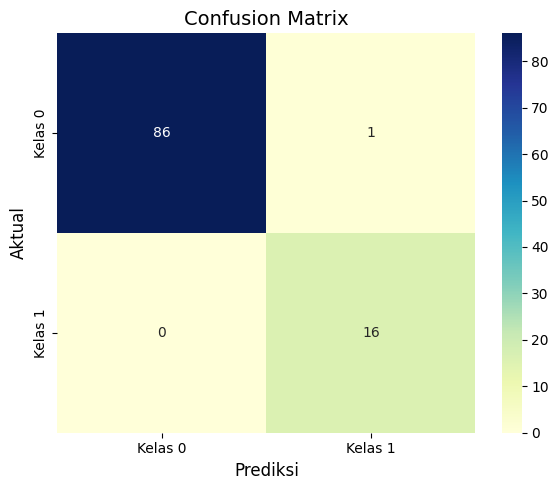

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi pentingnya fitur
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Pentingnya Fitur dalam Model Random Forest", fontsize=14)
plt.xlabel("Tingkat Kepentingan", fontsize=12)
plt.ylabel("Fitur", fontsize=12)
plt.tight_layout()
plt.show()

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=["Kelas 0", "Kelas 1"], yticklabels=["Kelas 0", "Kelas 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Aktual", fontsize=12)
plt.tight_layout()
plt.show()
